In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import statsmodels.api as sm
import pylab as py
import uncertainties.unumpy as unp
import uncertainties as unc

# Question 1

In [2]:
df1 = pd.read_csv('Group_11_Question_1_Data.csv', index_col=0)
df1.describe()

,Period 1,Period 2
count,20.000000,20.000000
mean,26.429001,12.755438
std,6.174648,1.310644
min,11.619726,11.239848
25%,23.946297,11.922177
50%,27.201267,12.534074
75%,30.982160,12.957735
max,33.417412,17.255720


In [46]:
def check_normality(data):
    test_stat_normality, p_value_normality=stats.shapiro(data)
    print("p value:%.4f" % p_value_normality)
    if p_value_normality <0.05:
        print("Reject null hypothesis >> The data is not normally distributed")
    else:
        print("Fail to reject null hypothesis >> The data is normally distributed")

check_normality(df1["Period 1"])
check_normality(df1["Period 2"])

In [53]:
def check_variance_homogeneity(group1, group2):
    test_stat_var, p_value_var= stats.levene(group1,group2)
    print("p value:%.4f" % p_value_var)
    if p_value_var <0.05:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

# see F-test 
check_variance_homogeneity(df1["Period 1"], df1["Period 2"])

## QQ-plot, Histograms

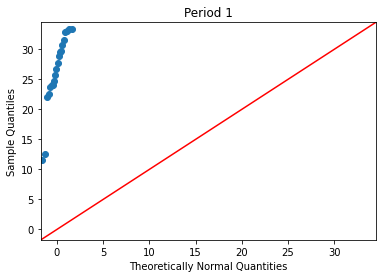

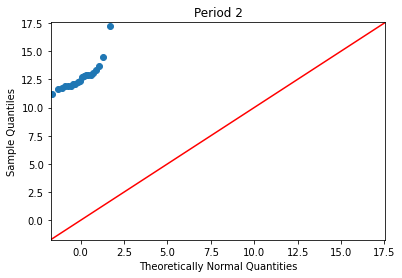

In [44]:
sm.qqplot(df1["Period 1"], line ='45')
py.xlabel('Theoretically Normal Quantities')
py.title('Period 1')
sm.qqplot(df1["Period 2"], line ='45')
py.xlabel('Theoretically Normal Quantities')
py.title('Period 2')
py.show()

Text(0.5, 0, 'Kappa')

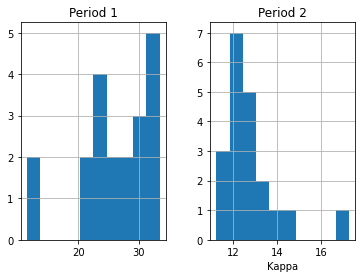

In [46]:
df1.hist()
plt.xlabel('Kappa')

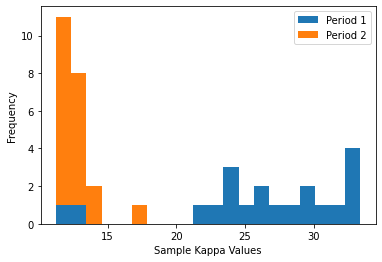

In [49]:
plt.hist(df1, bins=20, histtype='barstacked')
plt.legend(df1.columns)
plt.xlabel('Sample Kappa Values')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'Kappa')

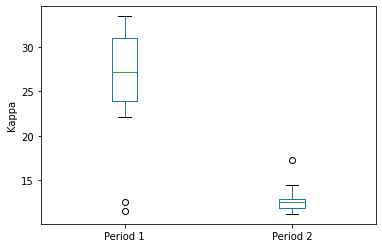

In [14]:
df1.boxplot(grid=False)
plt.ylabel('Kappa')

{'bodies': [<matplotlib.collections.PolyCollection at 0x18ed9e569e0>,
 'cmaxes': <matplotlib.collections.LineCollection at 0x18ed9e56a10>,
 'cmins': <matplotlib.collections.LineCollection at 0x18ed9e8c400>,
 'cbars': <matplotlib.collections.LineCollection at 0x18ed9e8c7f0>}

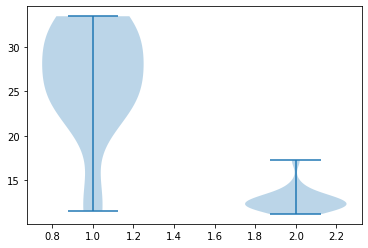

In [16]:
plt.violinplot(df1)

## Wilcoxon Rank-Sum / Mann Whitney U Test

Assuming:
1. The populations are continuous / ordinal
2. The probability density functions are of the same size and shape, but only shifted in location

(#2 is shaky, but possible if assuming that the measurment method provides the same distribution, but shifted, for Kappa regardless of type of wood)

Let

* H<sub>0</sub>: The distributions for Periods 1 and 2 are identical
* H<sub>1</sub>: The distributions for Periods 1 and 2 are different

A confidence level of 95% will be required to reject the null hypothesis in favor of the alternative

In [50]:
def test_mannwhtneyu_hypothesis(x1, x2):
    U, p = stats.mannwhitneyu(x1, x2)

    print("p value:%.10f" % p)
    if p <0.05:
        print("Reject null hypothesis >> The distributions for Periods 1 and 2 are different")
    else:
        print("Fail to reject null hypothesis >> The distributions for Periods 1 and 2 are identical")

test_mannwhtneyu_hypothesis(df1["Period 1"], df1["Period 2"])

p value:0.0000039874
Reject null hypothesis >> The distributions for Periods 1 and 2 are different


## Kruskal-Wallis H test

Extension of the Mann-Whitney

Let

* H<sub>0</sub>: The median Kappa for Periods 1 and 2 are identical
* H<sub>1</sub>: The median Kappa for Periods 1 and 2 are different

In [56]:
def test_kruskalwallish_hypothesis():
    H, p = stats.kruskal(df1["Period 1"], df1["Period 2"])

    print("p value:%.10f" % p)
    if p <0.05:
        print("Reject null hypothesis >> The median Kappa for Periods 1 and 2 are different")
    else:
        print("Fail to reject null hypothesis >> The median Kappa for Periods 1 and 2 are identical")

test_kruskalwallish_hypothesis()

p value:0.0000037358
Reject null hypothesis >> The median Kappa for Periods 1 and 2 are different


## F-test for variance

In [7]:
def f_test(x1: pd.Series, x2: pd.Series):

    # Ensures the F statistic is greater than 1, by assigning the larger standard deviation to the numerator
    if x1.std() < x2.std():
        x1, x2 = x2, x1

    # Calculate F statistic
    F = x1.std()**2 / x2.std()**2

    # Set degrees of freedom
    kwargs = dict(dfn= (x1.size -1), dfd= (x2.size -1))

    # Find critical value of F distribution at 95% confidence level
    F_crit = stats.f.ppf(q=1-0.05, **kwargs)

    if F > F_crit:
        print("Reject null hypothesis >> The variances of the samples are different.")
    else:
        print("Fail to reject null hypothesis >> The variances of the samples are same.")

f_test(df1["Period 1"], df1["Period 2"])

Reject null hypothesis >> The variances of the samples are different.


## Non-pooled t-test

Assumes the underlying distributions are normal

* H<sub>0</sub>: $\mu_1 = \mu_2$

In [8]:
def non_pooled_ttest(x1, x2):

    t, p = stats.ttest_ind(x1, x2, equal_var=False)

    print("p value:%.10f" % p)
    if p <0.05:
        print("Reject null hypothesis >> The distributions for Periods 1 and 2 are different")
    else:
        print("Fail to reject null hypothesis >> The distributions for Periods 1 and 2 are identical")


non_pooled_ttest(df1["Period 1"], df1["Period 2"])

p value:0.0000000039
Reject null hypothesis >> The distributions for Periods 1 and 2 are different


# Question 2

In [18]:
df2 = pd.read_csv("Group_11_Question_2_Data.csv", index_col=0)


White Liquor Carbonate    14.328484
White Liquor TTA          89.871505
dtype: float64

<AxesSubplot:xlabel='White Liquor Carbonate', ylabel='White Liquor TTA'>

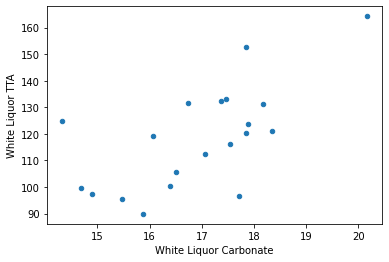

In [11]:
df2.plot(x="White Liquor Carbonate", y="White Liquor TTA", style="o", kind='scatter')

Optimal Values
a: 8.930397762563143
b: -32.68171554346179
R^2: 0.4238451985434798
Uncertainty
a: 8.9+/-2.5
b: (-3+/-4)e+01


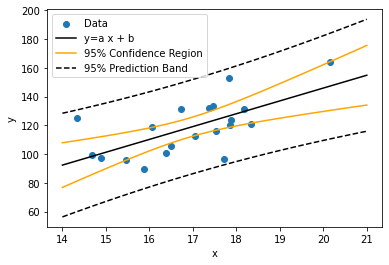

In [21]:
x = df2["White Liquor Carbonate"]
y = df2["White Liquor TTA"]


# from https://apmonitor.com/che263/index.php/Main/PythonRegressionStatistics

def f(x, a, b):
    return a * x + b

popt, pcov = curve_fit(f, x, y)

# retrieve parameter values
a = popt[0]
b = popt[1]
print('Optimal Values')
print('a: ' + str(a))
print('b: ' + str(b))

# compute r^2
r2 = 1.0-(sum((y-f(x,a,b))**2)/((len(y)-1.0)*np.var(y,ddof=1)))
print('R^2: ' + str(r2))

# calculate parameter confidence interval
a,b = unc.correlated_values(popt, pcov)
print('Uncertainty')
print('a: ' + str(a))
print('b: ' + str(b))

# plot data
plt.scatter(x, y, label='Data')

# calculate regression confidence interval
px = np.linspace(14, 21, 100)
py = a*px+b
nom = unp.nominal_values(py)
std = unp.std_devs(py)

def predband(x, xd, yd, p, func, conf=0.95):
    # x = requested points
    # xd = x data
    # yd = y data
    # p = parameters
    # func = function name
    alpha = 1.0 - conf    # significance
    N = xd.size          # data sample size
    var_n = len(p)  # number of parameters
    # Quantile of Student's t distribution for p=(1-alpha/2)
    q = stats.t.ppf(1.0 - alpha / 2.0, N - var_n)
    # Stdev of an individual measurement
    se = np.sqrt(1. / (N - var_n) * \
                 np.sum((yd - func(xd, *p)) ** 2))
    # Auxiliary definitions
    sx = (x - xd.mean()) ** 2
    sxd = np.sum((xd - xd.mean()) ** 2)
    # Predicted values (best-fit model)
    yp = func(x, *p)
    # Prediction band
    dy = q * se * np.sqrt(1.0+ (1.0/N) + (sx/sxd))
    # Upper & lower prediction bands.
    lpb, upb = yp - dy, yp + dy
    return lpb, upb

lpb, upb = predband(px, x, y, popt, f, conf=0.95)

# plot the regression
plt.plot(px, nom, c='black', label='y=a x + b')

# uncertainty lines (95% confidence)
plt.plot(px, nom - 1.96 * std, c='orange',\
         label='95% Confidence Region')
plt.plot(px, nom + 1.96 * std, c='orange')
# prediction band (95% confidence)
plt.plot(px, lpb, 'k--',label='95% Prediction Band')
plt.plot(px, upb, 'k--')
plt.ylabel('y')
plt.xlabel('x')
plt.legend()